# Chow Test

The Chow test, proposed by econometrician Gregory Chow in 1960, is a test of whether the true coefficients in two linear regressions on different data sets are equal. This test is specially useful for identifying change points in a timeseries, when we now the position of the potential breakpoint.

### Imports

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Functions

In [2]:
def ssr(y, yhat):
    return np.sum(np.power(yhat-y,2))

In [3]:
def chow_test(y_total, breakpoint, x_total=None, p_value = 0.05):
    # 1. Get segments in the time series before/after breakpoint
    y_before = y_total[:breakpoint] #timeseries before change point
    y_after = y_total[breakpoint:] #timeseries after change point
    
    if x_total is None:
        x_total = np.arange(len(y_total))
    x_before = x_total[:breakpoint] #time index before change point
    x_after = x_total[breakpoint:] #time index after change point
    
    #2. Fit a linear regression for each segment
    a,b = np.polyfit(x_before, y_before, deg=1)
    yhat_before = a*x_before + b # linear regression for before segment
    
    a,b = np.polyfit(x_after, y_after, deg=1)
    yhat_after = a*x_after + b # linear regression for after segment
    
    a,b = np.polyfit(x_total, y_total, deg=1)
    yhat_total = a*x_total+ b # total linear regression
    
    #3. Get the sum of squared errors (ssr) for each segment 
    ssr_before = ssr(y_before, yhat_before)
    ssr_after = ssr(y_after, yhat_after)
    ssr_total = ssr(y_total, yhat_total)
    
    #4. Compute Chow's test statistc
    k1 = 2 # degree of freedom 
    k2 = (len(y_total) - 2*k1)
    numerator = ((ssr_total - (ssr_before + ssr_after)) / k1)
    denominator = ((ssr_before + ssr_after) / k2)
    chow = numerator/denominator
    
    # 5. Perform test
    p = 1-stats.f.cdf(chow, k1, k2) #get p-value from F distribution
    if p < p_value:
        print("Reject the null hypothesis. There is a structural break at time {}".format(breakpoint))
        return True
    else:
        print("Accept the null hypothesis. There is no structural break at time {}".format(breakpoint))
        return False

### Examples

In [4]:
N = 1000

Accept the null hypothesis. There is no structural break at time 194


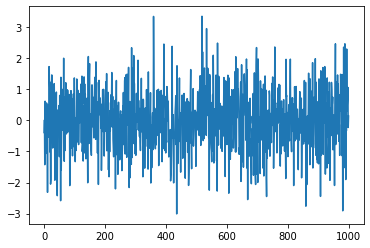

In [5]:
y1 = np.random.normal(0,1,N)
breakpoint = np.random.randint(N)
is_changepoint = chow_test(y1, breakpoint)
plt.plot(y1)
if is_changepoint:
    plt.axvline(breakpoint, color='r', linestyle='--')
plt.show()

Reject the null hypothesis. There is a structural break at time 719


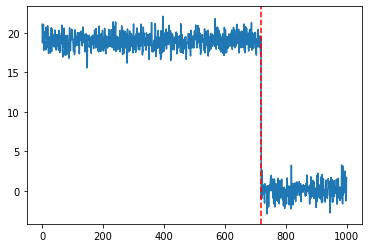

In [6]:
y2 = np.random.normal(0,1,N)
breakpoint = np.random.randint(N)
intercept = np.random.randint(10, 20)
y2[:breakpoint] = y2[:breakpoint]+ intercept
is_changepoint = chow_test(y2, breakpoint)
plt.plot(y2)
if is_changepoint:
    plt.axvline(breakpoint, color='r', linestyle='--')
plt.show()


Accept the null hypothesis. There is no structural break at time 507


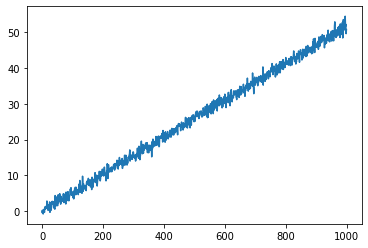

In [7]:
y3 = np.random.normal(0,1,N)
breakpoint = np.random.randint(N)
slope = np.random.uniform(0,1)
y3 = y3 + slope*np.arange(N)
is_changepoint = chow_test(y3, breakpoint)
plt.plot(y3)
if is_changepoint:
    plt.axvline(breakpoint, color='r', linestyle='--')
plt.show()


Reject the null hypothesis. There is a structural break at time 625


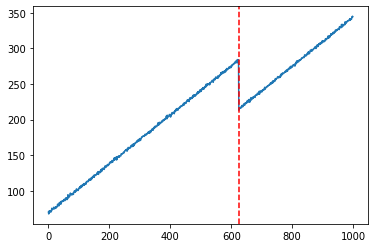

In [8]:
y4 = np.random.normal(0,1,N)
breakpoint = np.random.randint(N)
slope = np.random.uniform(0,1)
intercept = np.random.randint(50, 100)
y4 = y4 + slope*np.arange(N)
y4[:breakpoint] = y4[:breakpoint] + intercept
is_changepoint = chow_test(y4, breakpoint)
plt.plot(y4)
if is_changepoint:
    plt.axvline(breakpoint, color='r', linestyle='--')
plt.show()
